# ***üìå Extrac√£o***

In [33]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

# ***üîß Transforma√ß√£o***

In [34]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [35]:
df.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [36]:
df['customer'].head(3)


0    {'gender': 'Female', 'SeniorCitizen': 0, 'Part...
1    {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...
2    {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...
Name: customer, dtype: object

In [37]:
customer_df = pd.json_normalize(df['customer'])
customer_df.head()


gender  SeniorCitizen Partner Dependents  tenure
0  Female              0     Yes        Yes       9
1    Male              0      No         No       9
2    Male              0      No         No       4
3    Male              1     Yes         No      13
4  Female              1     Yes         No       3

In [38]:
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df_expanded = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

In [39]:
df_expanded.isnull().sum()


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [40]:
df_expanded.duplicated().sum()


np.int64(0)

In [41]:
df_expanded['Churn'].unique()


array(['No', 'Yes', ''], dtype=object)

In [60]:
import numpy as np

df_expanded['Churn'].replace('', np.nan, inplace=True)


<ipython-input-60-276c5205a0e2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_expanded['Churn'].replace('', np.nan, inplace=True)


In [43]:
df_expanded['Churn'].isnull().sum()


np.int64(224)

In [44]:
df_expanded = df_expanded.dropna(subset=['Churn'])


In [45]:
df_expanded['Contas_Diarias'] = df_expanded['Charges.Monthly'] / 30


<ipython-input-45-21abed61fef4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expanded['Contas_Diarias'] = df_expanded['Charges.Monthly'] / 30


In [46]:
df_expanded['Contas_Diarias'].describe()




count    7043.000000
mean        2.158723
std         1.003002
min         0.608333
25%         1.183333
50%         2.345000
75%         2.995000
max         3.958333
Name: Contas_Diarias, dtype: float64

In [58]:
colunas_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in colunas_binarias:
    df_expanded[col] = df_expanded[col].map({'Yes': 1, 'No': 0})


In [59]:
df_expanded['Charges.Monthly'] = pd.to_numeric(df_expanded['Charges.Monthly'], errors='coerce')
df_expanded['Charges.Total'] = pd.to_numeric(df_expanded['Charges.Total'], errors='coerce')


In [49]:
df_expanded[['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']].describe()


tenure  Charges.Monthly  Charges.Total  Contas_Diarias
count  7043.000000      7043.000000    7032.000000     7043.000000
mean     32.371149        64.761692    2283.300441        2.158723
std      24.559481        30.090047    2266.771362        1.003002
min       0.000000        18.250000      18.800000        0.608333
25%       9.000000        35.500000     401.450000        1.183333
50%      29.000000        70.350000    1397.475000        2.345000
75%      55.000000        89.850000    3794.737500        2.995000
max      72.000000       118.750000    8684.800000        3.958333

In [50]:
df_clean = df_expanded.dropna(subset=['Churn', 'Charges.Total', 'tenure']).copy()


In [51]:
df_clean['Churn'] = df_clean['Churn'].astype(str)


# ***üìä Carga e an√°lise***

In [52]:
df_expanded.describe()


Churn  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.265370       0.162147     0.483033     0.299588    32.371149   
std       0.441561       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       0.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  Charges.Monthly  Charges.Total  \
count   7043.000000       7043.000000      7043.000000    7032.000000   
mean       0.903166          0.592219        64.761692    2283.300441   
std        0.295752          0.491457        30.090047    2266.771362   
min        0.000000          0.000000        18.250000      18.800000   
25%        1.000000          0.000000        35.500000     401.450000   
50%        1.000000          1.000000        70.350000    1397.475000   
75%        1.000000          1.000000        89.850000    3794.737500   
max        1.000000          1.000000       118.750000    8684.800000   

       Contas_Diarias  
count     7043.000000  
mean         2.158723  
std          1.003002  
min          0.608333  
25%          1.183333  
50%          2.345000  
75%          2.995000  
max          3.958333

In [53]:
df_expanded[['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']].agg(['mean', 'median', 'std', 'min', 'max'])


tenure  Charges.Monthly  Charges.Total  Contas_Diarias
mean    32.371149        64.761692    2283.300441        2.158723
median  29.000000        70.350000    1397.475000        2.345000
std     24.559481        30.090047    2266.771362        1.003002
min      0.000000        18.250000      18.800000        0.608333
max     72.000000       118.750000    8684.800000        3.958333

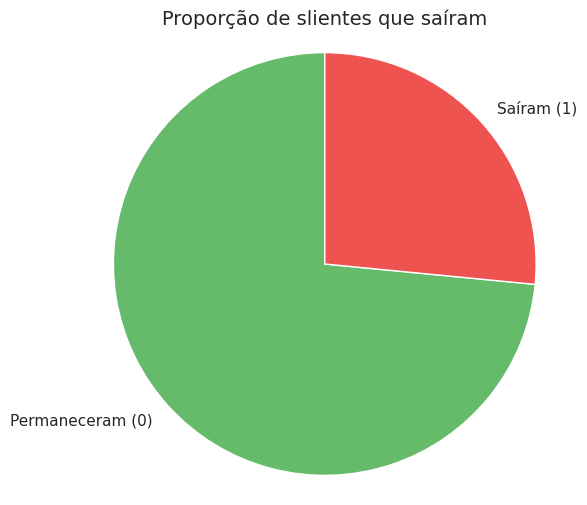

In [54]:
import matplotlib.pyplot as plt

churn_counts = df_expanded['Churn'].value_counts()
colors = ['#66bb6a', '#ef5350']
labels = ['Permaneceram (0)', 'Sa√≠ram (1)']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, colors=colors, startangle=90)
plt.title('Propor√ß√£o de slientes que sa√≠ram', fontsize=14)
plt.axis('equal')
plt.grid(False)

plt.show()


<ipython-input-55-360a1f2febaa>:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
<ipython-input-55-360a1f2febaa>:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
<ipython-input-55-360a1f2febaa>:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


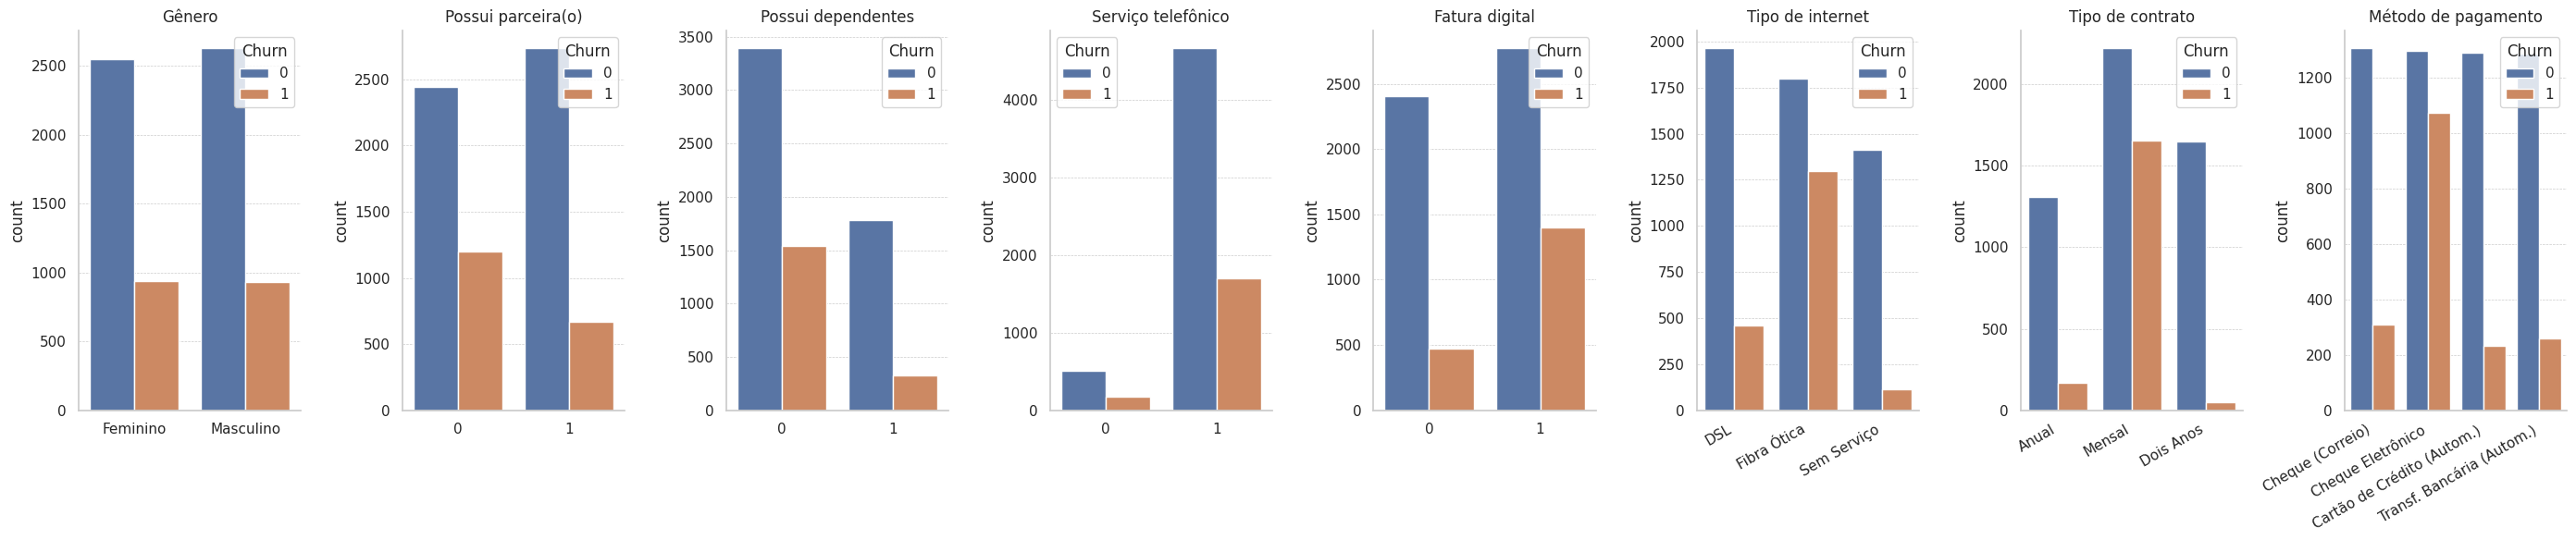

In [55]:
import seaborn as sns

df_traduzido = df_expanded.copy()

traducoes_eixo_x = {
    'gender': {
        'Female': 'Feminino',
        'Male': 'Masculino'
    },
    'InternetService': {
        'DSL': 'DSL',
        'Fiber optic': 'Fibra √ìtica',
        'No': 'Sem Servi√ßo'
    },
    'Contract': {
        'Month-to-month': 'Mensal',
        'One year': 'Anual',
        'Two year': 'Dois Anos'
    },
    'PaymentMethod': {
        'Mailed check': 'Cheque (Correio)',
        'Electronic check': 'Cheque Eletr√¥nico',
        'Credit card (automatic)': 'Cart√£o de Cr√©dito (Autom.)',
        'Bank transfer (automatic)': 'Transf. Banc√°ria (Autom.)'
    }
}

for coluna, mapa in traducoes_eixo_x.items():
    df_traduzido[coluna] = df_traduzido[coluna].replace(mapa)

colunas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
           'InternetService', 'Contract', 'PaymentMethod']

titulos = {
    'gender': 'G√™nero',
    'Partner': 'Possui parceira(o)',
    'Dependents': 'Possui dependentes',
    'PhoneService': 'Servi√ßo telef√¥nico',
    'PaperlessBilling': 'Fatura digital',
    'InternetService': 'Tipo de internet',
    'Contract': 'Tipo de contrato',
    'PaymentMethod': 'M√©todo de pagamento'
}

fig, axs = plt.subplots(1, len(colunas), figsize=(28, 6))

for i, col in enumerate(colunas):
    ax = axs[i]
    sns.countplot(data=df_traduzido, x=col, hue='Churn', ax=ax)

    ax.set_title(titulos[col])
    ax.set_xlabel('')
    ax.grid(True, linestyle='--', linewidth=0.5, axis='y')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if col in ['Contract', 'PaymentMethod', 'InternetService']:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

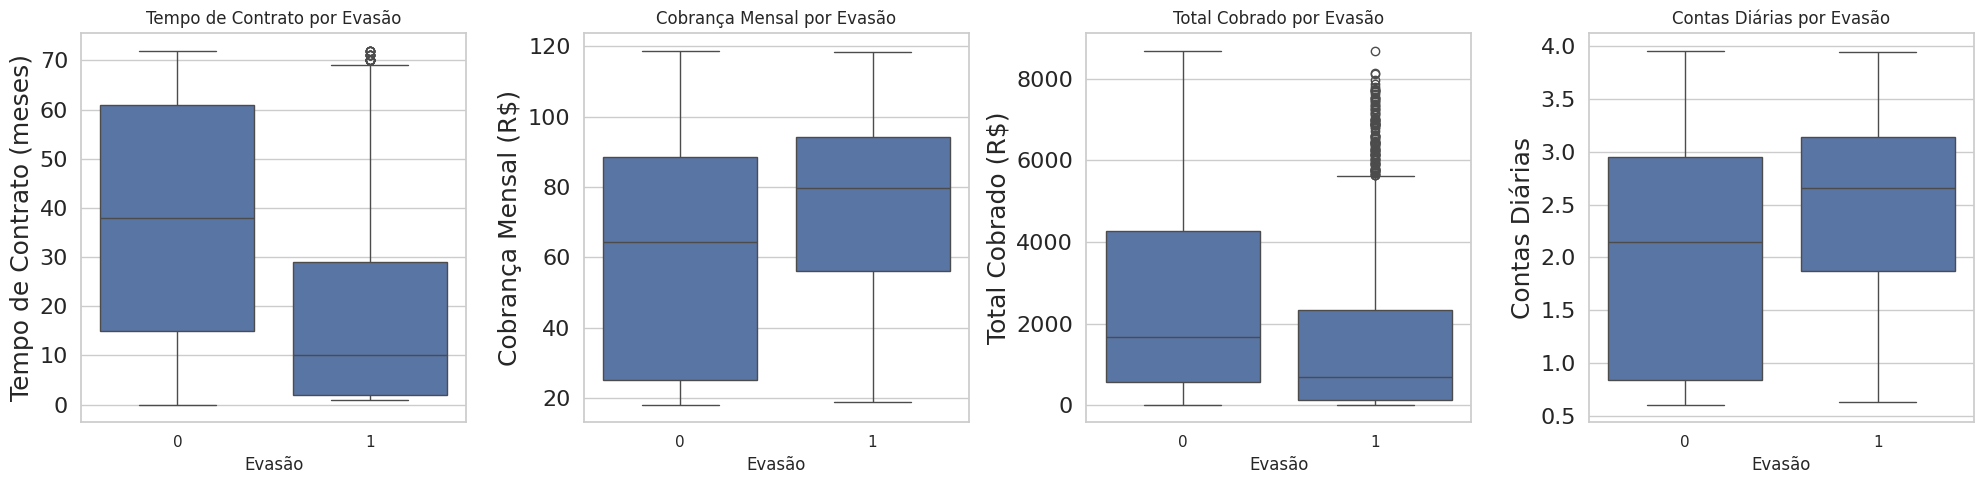

In [56]:
plt.figure(figsize=(20,5))

plt.subplot(1, 4, 1)
sns.boxplot(x='Churn', y='tenure', data=df_expanded)
plt.xlabel('Evas√£o')
plt.ylabel('Tempo de Contrato (meses)', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Tempo de Contrato por Evas√£o')

plt.subplot(1, 4, 2)
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_expanded)
plt.xlabel('Evas√£o')
plt.ylabel('Cobran√ßa Mensal (R$)', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Cobran√ßa Mensal por Evas√£o')

plt.subplot(1, 4, 3)
sns.boxplot(x='Churn', y='Charges.Total', data=df_expanded)
plt.xlabel('Evas√£o')
plt.ylabel('Total Cobrado (R$)', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Total Cobrado por Evas√£o')

plt.subplot(1, 4, 4)
sns.boxplot(x='Churn', y='Contas_Diarias', data=df_expanded)
plt.xlabel('Evas√£o')
plt.ylabel('Contas Di√°rias', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Contas Di√°rias por Evas√£o')

plt.tight_layout()
plt.show()


<ipython-input-57-e047dc948697>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])
<ipython-input-57-e047dc948697>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])
<ipython-input-57-e047dc948697>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])


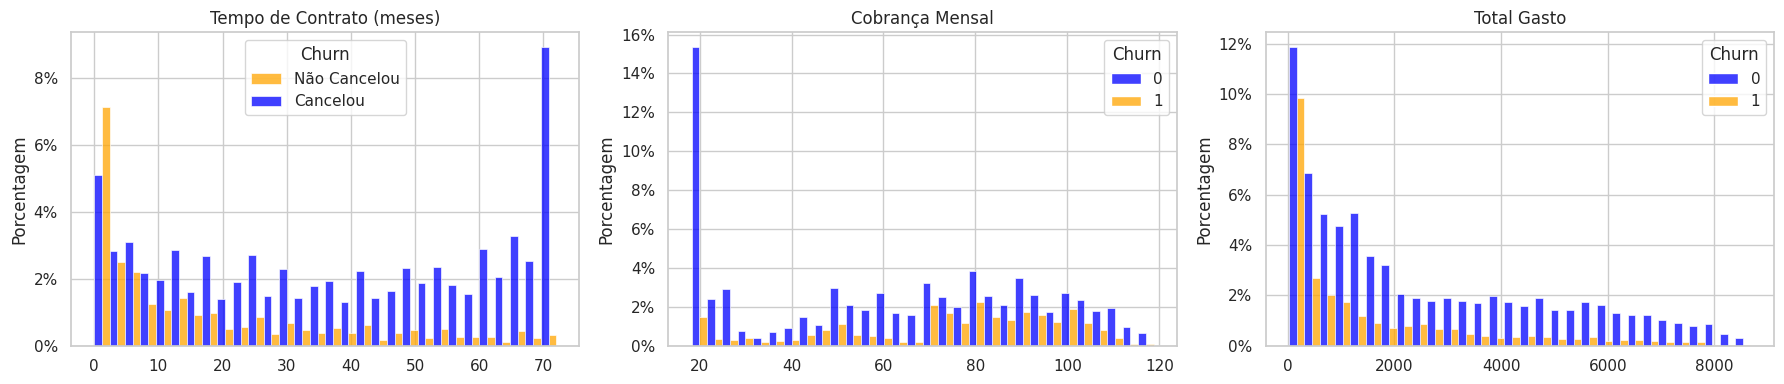

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

variaveis_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
titulos = ['Tempo de Contrato (meses)', 'Cobran√ßa Mensal', 'Total Gasto']

for i, var in enumerate(variaveis_numericas):
    ax = axs[i]
    sns.histplot(data=df_expanded, x=var, hue='Churn', stat='percent', multiple='dodge', bins=30,
                 palette={0: 'blue', 1: 'orange'}, ax=ax)
    ax.set_title(titulos[i])
    ax.set_ylabel('Porcentagem')
    ax.set_xlabel('')
    ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])

axs[0].legend(title='Churn', labels=['N√£o Cancelou', 'Cancelou'])
plt.tight_layout()
plt.show()


# ***üìÑRelatorio Final***

# Relat√≥rio Final ‚Äì An√°lise de Evas√£o de Clientes (Churn)

## üßæ Introdu√ß√£o

Este projeto tem como objetivo analisar os dados de uma empresa de telecomunica√ß√µes para entender os fatores que influenciam a **evas√£o de clientes (churn)**. Reduzir a evas√£o √© crucial para a sa√∫de financeira e o crescimento sustent√°vel da empresa, pois reter clientes √© geralmente mais barato do que adquirir novos.

A an√°lise utiliza um conjunto de dados que cont√©m informa√ß√µes demogr√°ficas, tipos de servi√ßos contratados, formas de pagamento e m√©tricas financeiras dos clientes.

---

## üßπ Limpeza e Tratamento de Dados

Os principais passos realizados foram:

- **Importa√ß√£o dos dados** a partir de uma API, seguido da transforma√ß√£o em DataFrame.
- **Verifica√ß√£o de valores nulos**, com preenchimento ou exclus√£o quando necess√°rio.
- Convers√£o de colunas categ√≥ricas e num√©ricas para os tipos corretos.
- Cria√ß√£o de colunas auxiliares, como `Contas Di√°rias`, `Evas√£o` (`Churn`) e categorias agrupadas.

Essas etapas garantiram que os dados estivessem prontos para an√°lise, com consist√™ncia e padroniza√ß√£o.

---

## üìä An√°lise Explorat√≥ria de Dados

### 1. Distribui√ß√£o Geral da Evas√£o

Analisamos a propor√ß√£o de clientes que cancelaram seus contratos.

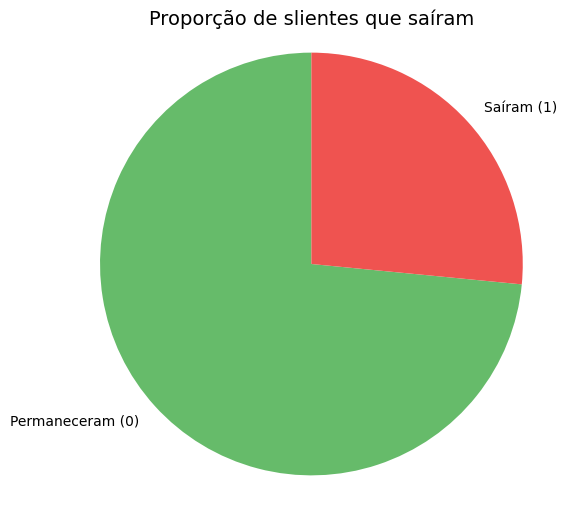

---

### 2. Evas√£o por Vari√°veis Categ√≥ricas

Foram utilizadas barras empilhadas para analisar a taxa de churn entre diferentes grupos:

- **G√™nero**
- **Presen√ßa de parceiro(a)**
- **Dependentes**
- **Tipo de contrato**
- **Tipo de pagamento**
- **Tipo de servi√ßo de internet**

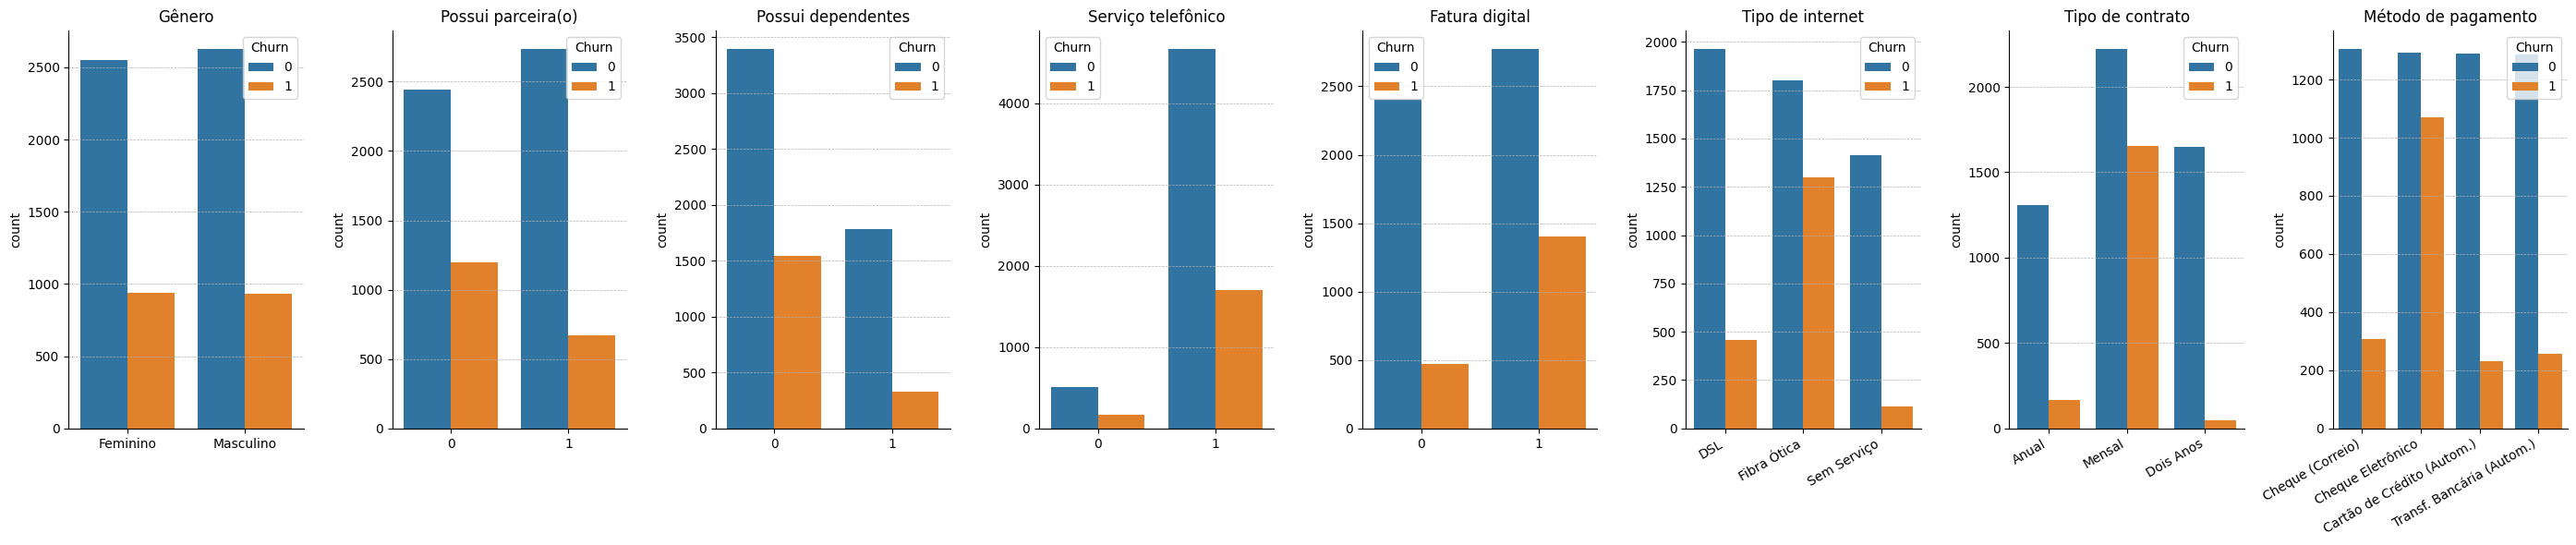

**Principais achados:**

- Contratos do tipo **mensal** apresentam maior evas√£o.
- Clientes com **fatura eletr√¥nica** tendem a cancelar mais.
- Ter **dependentes** e **parceiros(as)** est√° associado a maior fidelidade.

---

### 3. Evas√£o por Vari√°veis Num√©ricas

#### a) Histogramas com Porcentagem

Visualizamos como vari√°veis cont√≠nuas se distribuem entre clientes que cancelaram ou n√£o.

- **Tempo de Contrato (meses)**
- **Cobran√ßa Mensal**
- **Total Gasto**

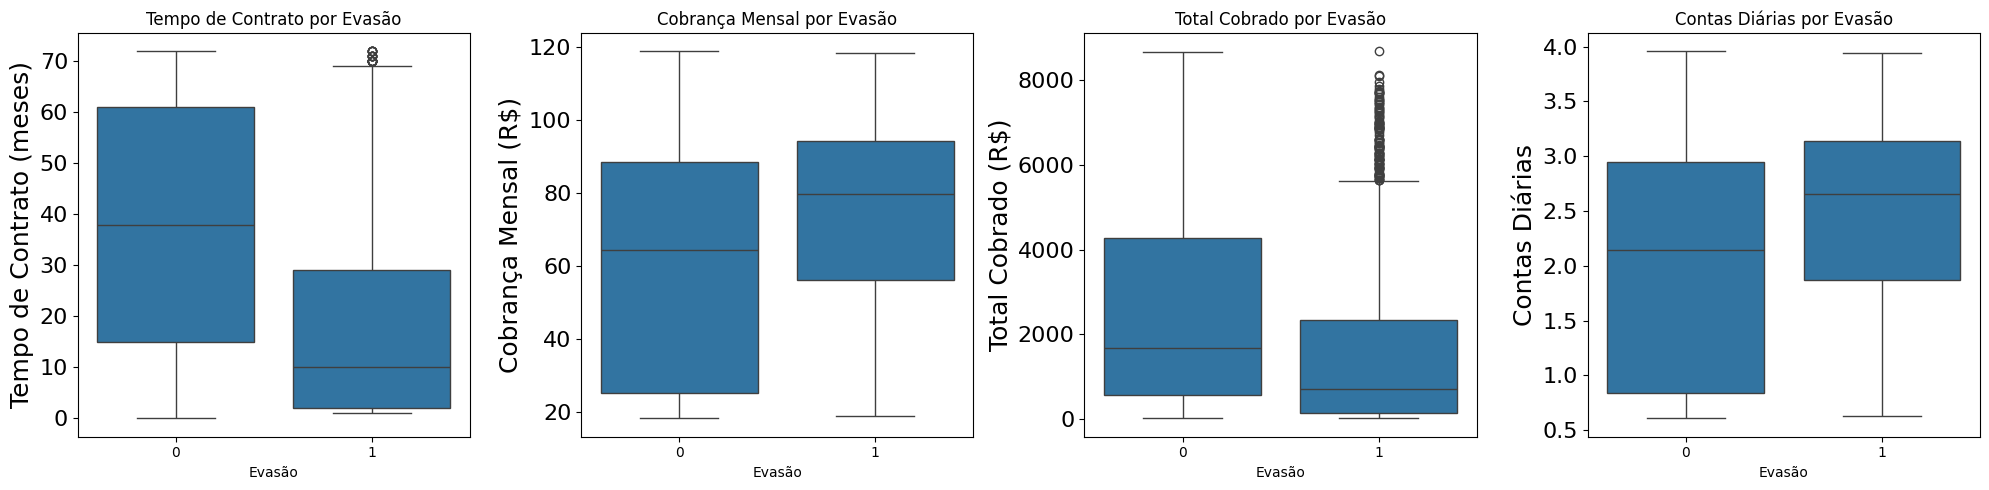

**Observa√ß√µes:**

- Quem tem **pouco tempo de contrato** cancela mais.
- **Cobran√ßas mensais mais altas** est√£o associadas √† evas√£o.
- Clientes que **gastaram menos no total** cancelam com mais frequ√™ncia (possivelmente por serem mais novos).

#### b) Boxplots por Evas√£o

Para refor√ßar os padr√µes identificados, foram criados boxplots que comparam vari√°veis financeiras entre os dois grupos (cancelaram e n√£o cancelaram):

- Tempo de contrato
- Cobran√ßa mensal
- Total gasto

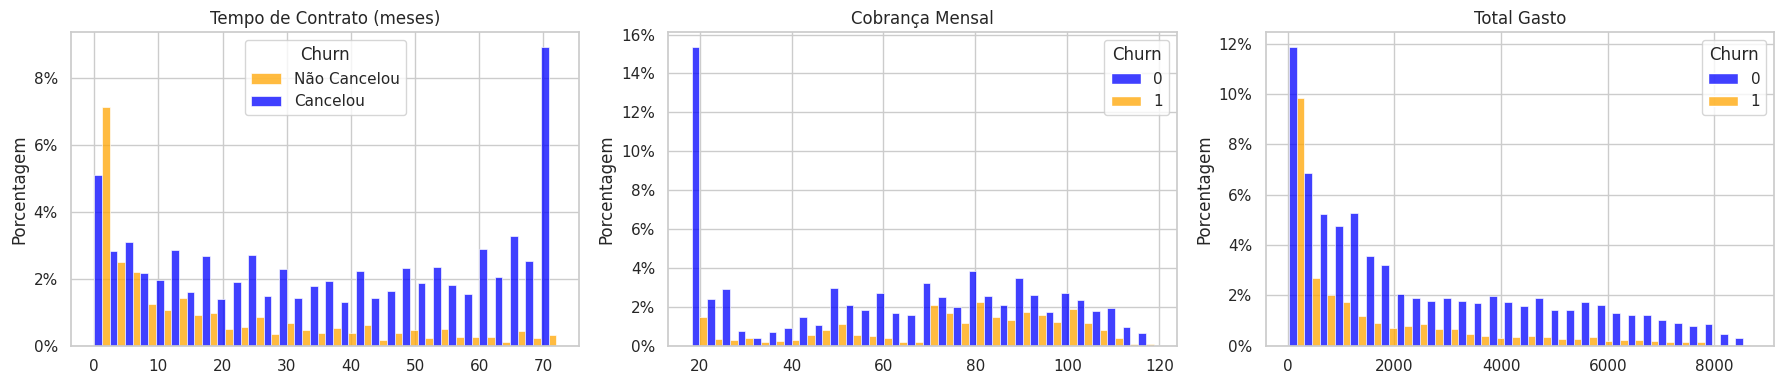
**Conclus√µes visuais:**

- Clientes que **ficaram** t√™m contratos mais longos e maior total gasto.
- Clientes que **cancelaram** apresentam maior mediana de cobran√ßa mensal e mais contas di√°rias, indicando uso mais intenso dos servi√ßos.

---

## üß† Conclus√µes e Insights

- A evas√£o est√° fortemente relacionada a **contratos de curto prazo** e **cobran√ßas mensais elevadas**.
- **Clientes novos** e com **menor total gasto** t√™m maior probabilidade de sair.
- Servi√ßos como **fatura eletr√¥nica** e **internet via fibra** tamb√©m se destacam como pontos de aten√ß√£o.
- **Perfis familiares** (com parceiro(a) e filhos) tendem a ser mais fi√©is.

---

## ‚úÖ Recomenda√ß√µes

Com base na an√°lise, recomendamos:

1. **Oferecer incentivos para contratos mais longos**, como descontos progressivos.
2. Criar **alertas para clientes com alto uso di√°rio e cobran√ßa mensal elevada**, sugerindo planos mais adequados.
3. Reavaliar a experi√™ncia de clientes com **fatura eletr√¥nica**, tornando-a mais clara e personalizada.
4. Desenvolver campanhas espec√≠ficas para **clientes novos**, incentivando a perman√™ncia nos primeiros meses.
5. Monitorar de perto clientes que contrataram **apenas um ou dois servi√ßos**, pois eles demonstram maior taxa de evas√£o.

---

üìå Esta an√°lise oferece uma base s√≥lida para a√ß√µes estrat√©gicas de reten√ß√£o. Para pr√≥ximos passos, pode-se aplicar **modelos preditivos de churn** e simular cen√°rios com base nos dados hist√≥ricos.

